# Python the basics: numpy

> *DS Data manipulation, analysis and visualisation in Python*  
> *September, 2020*


In [1]:
%matplotlib inline

# Numpy -  multidimensional data arrays

## Introduction

NumPy is the fundamental package for scientific computing with Python. It contains among other things:

* a powerful N-dimensional array/vector/matrix object
* sophisticated (broadcasting) functions
* function implementation in C/Fortran assuring good performance if vectorized
* tools for integrating C/C++ and Fortran code
* useful linear algebra, Fourier transform, and random number capabilities

Also known as *array oriented computing*. The recommended convention to import numpy is:

In [1]:
import numpy as np

In the `numpy` package the terminology used for vectors, matrices and higher-dimensional data sets is *array*. Let's already load some other modules too.



In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

/Users/constantinbogdanas/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Showcases

### Roll the dice

You like to play boardgames, but you want to better know you're chances of rolling a certain combination with 2 dices:

In [7]:
def mydices(throws):
    """
    Function to create the distrrbution of the sum of two dices.
    
    Parameters
    ----------
    throws : int
        Number of throws with the dices
    """
    stone1 = np.random.uniform(1, 6, throws) 
    stone2 = np.random.uniform(1, 6, throws) 
    total = stone1 + stone2
    return plt.hist(total, bins=20) # We use matplotlib to sho histogram

(array([ 2.,  2.,  1.,  2.,  6.,  4.,  6.,  8.,  5.,  8.,  8., 11.,  4.,
         5.,  6.,  5.,  5.,  3.,  4.,  5.]),
 array([ 2.66122765,  3.08629083,  3.51135401,  3.9364172 ,  4.36148038,
         4.78654356,  5.21160675,  5.63666993,  6.06173311,  6.4867963 ,
         6.91185948,  7.33692266,  7.76198585,  8.18704903,  8.61211221,
         9.0371754 ,  9.46223858,  9.88730177, 10.31236495, 10.73742813,
        11.16249132]),
 <a list of 20 Patch objects>)

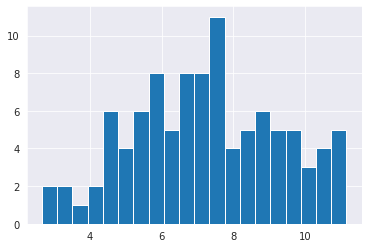

In [8]:
mydices(100) # test this out with multiple options

In [13]:
np.random.random(10)

array([0.933641  , 0.77542183, 0.60620507, 0.02342958, 0.0109501 ,
       0.811527  , 0.80232505, 0.36354177, 0.4089687 , 0.80201921])

### Cartesian2Polar

Consider a random 10x2 matrix representing cartesian coordinates, how to convert them to polar coordinates

Text(0.5, 1.05, 'Polar')

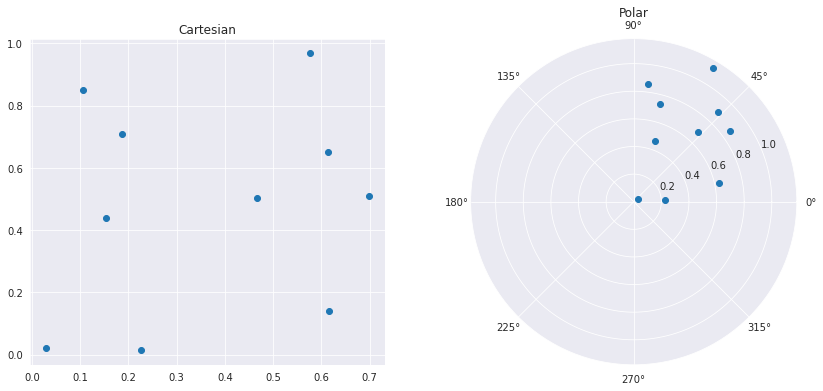

In [14]:
# random numbers (X, Y in 2 columns)
Z = np.random.random((10,2))
X, Y = Z[:,0], Z[:,1]

# distance
R = np.sqrt(X**2 + Y**2)
# angle
T = np.arctan2(Y, X) # Array of angles in radians
Tdegree = T*180/(np.pi) # If you like degrees more

# NEXT PART (now for illustration)
#plot the cartesian coordinates
plt.figure(figsize=(14, 6))
ax1 = plt.subplot(121)
ax1.plot(Z[:,0], Z[:,1], 'o')
ax1.set_title("Cartesian")
#plot the polar coorsidnates
ax2 = plt.subplot(122, polar=True)
ax2.plot(T, R, 'o')
ax2.set_title("Polar")

### Speed

Memory-efficient container that provides fast numerical operations:

In [15]:
L = range(1000)
%timeit [i**2 for i in L]

1000 loops, best of 5: 262 µs per loop


In [16]:
a = np.arange(1000)
%timeit a**2

The slowest run took 62.97 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 1.44 µs per loop


In [17]:
#More information about array?
np.array?

## Creating `numpy` arrays

There are a number of ways to initialize new numpy arrays, for example from

* a Python list or tuples
* using functions that are dedicated to generating numpy arrays, such as `arange`, `linspace`, etc.
* reading data from files

### From lists

For example, to create new vector and matrix arrays from Python lists we can use the `numpy.array` function.

In [18]:
# a vector: the argument to the array function is a Python list
V = np.array([1, 2, 3, 4])
V

array([1, 2, 3, 4])

In [19]:
# a matrix: the argument to the array function is a nested Python list
M = np.array([[1, 2], [3, 4]])
M

array([[1, 2],
       [3, 4]])

The `v` and `M` objects are both of the type `ndarray` that the `numpy` module provides.

In [20]:
type(V), type(M)

(numpy.ndarray, numpy.ndarray)

The difference between the `v` and `M` arrays is only their shapes. We can get information about the shape of an array by using the `ndarray.shape` property.

In [21]:
V.shape

(4,)

In [22]:
M.shape

(2, 2)

The number of elements in the array is available through the `ndarray.size` property:

In [23]:
M.size

4

Equivalently, we could use the function `numpy.shape` and `numpy.size`

In [24]:
np.shape(M)

(2, 2)

In [25]:
np.size(M)

4

Using the `dtype` (data type) property of an `ndarray`, we can see what type the data of an array has (always fixed for each array, cfr. Matlab):

In [26]:
M.dtype

dtype('int64')

We get an error if we try to assign a value of the wrong type to an element in a numpy array:

In [ ]:
#M[0,0] = "hello"  #uncomment this cell

In [27]:
f = np.array(['Bonjour', 'Hello', 'Hallo',])
f

array(['Bonjour', 'Hello', 'Hallo'], dtype='<U7')

If we want, we can explicitly define the type of the array data when we create it, using the `dtype` keyword argument: 

In [28]:
M = np.array([[1, 2], [3, 4]], dtype=complex)  #np.float64, np.float, np.int64

print(M, '\n', M.dtype)

[[1.+0.j 2.+0.j]
 [3.+0.j 4.+0.j]] 
 complex128


Since Numpy arrays are *statically typed*, the type of an array does not change once created. But we can explicitly cast an array of some type to another using the `astype` functions (see also the similar `asarray` function). This always create a new array of new type:

In [29]:
M = np.array([[1, 2], [3, 4]], dtype=float)
M2 = M.astype(int)
M2

array([[1, 2],
       [3, 4]])

Common type that can be used with `dtype` are: `int`, `float`, `complex`, `bool`, `object`, etc.

We can also explicitly define the bit size of the data types, for example: `int64`, `int16`, `float64`, `float128`, `complex128`.

Higher order is also possible:

In [31]:
C = np.array([[[1], [2]], [[3], [4]]])
print(C.shape)
C

(2, 2, 1)


array([[[1],
        [2]],

       [[3],
        [4]]])

In [ ]:
C.ndim # number of dimensions

### Using array-generating functions

For larger arrays it is inpractical to initialize the data manually, using explicit python lists. Instead we can use one of the many functions in `numpy` that generates arrays of different forms. Some of the more common are:

#### arange

In [32]:
# create a range
x = np.arange(0, 10, 1) # arguments: start, stop, step
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [36]:
x = np.arange(-1, 1, 0.1)*10
x

array([-1.00000000e+01, -9.00000000e+00, -8.00000000e+00, -7.00000000e+00,
       -6.00000000e+00, -5.00000000e+00, -4.00000000e+00, -3.00000000e+00,
       -2.00000000e+00, -1.00000000e+00, -2.22044605e-15,  1.00000000e+00,
        2.00000000e+00,  3.00000000e+00,  4.00000000e+00,  5.00000000e+00,
        6.00000000e+00,  7.00000000e+00,  8.00000000e+00,  9.00000000e+00])

In [37]:
len(x)

20

#### linspace and logspace

In [38]:
# using linspace, both end points ARE included
np.linspace(0, 10, 25)

array([ 0.        ,  0.41666667,  0.83333333,  1.25      ,  1.66666667,
        2.08333333,  2.5       ,  2.91666667,  3.33333333,  3.75      ,
        4.16666667,  4.58333333,  5.        ,  5.41666667,  5.83333333,
        6.25      ,  6.66666667,  7.08333333,  7.5       ,  7.91666667,
        8.33333333,  8.75      ,  9.16666667,  9.58333333, 10.        ])

In [39]:
np.logspace(0, 10, 10, base=np.e)

array([1.00000000e+00, 3.03773178e+00, 9.22781435e+00, 2.80316249e+01,
       8.51525577e+01, 2.58670631e+02, 7.85771994e+02, 2.38696456e+03,
       7.25095809e+03, 2.20264658e+04])

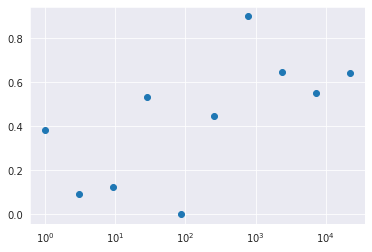

In [40]:
plt.plot(np.logspace(0, 10, 10, base=np.e), np.random.random(10), 'o')
plt.xscale('log')

#### random data

In [41]:
# uniform random numbers in [0,1]
np.random.rand(5,5)

array([[0.57375766, 0.6941114 , 0.81399528, 0.3043738 , 0.22776052],
       [0.2532074 , 0.96569044, 0.15294187, 0.80272366, 0.25049174],
       [0.38285211, 0.50087714, 0.38051839, 0.70802838, 0.05952841],
       [0.41426691, 0.9306325 , 0.34896936, 0.44865426, 0.20676032],
       [0.47780558, 0.11510647, 0.68119152, 0.77692084, 0.62143756]])

In [42]:
# standard normal distributed random numbers
np.random.randn(5,5)

array([[ 0.13552966, -0.3375475 ,  1.2125933 , -1.08653505, -1.95889849],
       [ 0.85946625,  0.12402577,  1.40932215,  0.02155508, -0.5044113 ],
       [ 0.23680551,  0.84807403, -1.47716898, -2.10126431, -2.2085128 ],
       [-1.74539957, -0.15328902, -1.14370193,  1.75008084, -0.01157745],
       [-1.50116494, -0.38903967, -0.44157353,  1.20571389, -0.03633013]])

#### zeros and ones

In [43]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [44]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

<div class="alert alert-success">
    <b>EXERCISE</b>: Create a vector with values ranging from 10 to 49 with steps of 1
</div>

<div class="alert alert-success">
    <b>EXERCISE</b>: Create a 3x3 identity matrix (look into docs!)
</div>

<div class="alert alert-success">
    <b>EXERCISE</b>: Create a 3x3x3 array with random values
</div>

------------

## File I/O

Numpy is capable of reading and writing text and binary formats. However, since most data-sources are providing information in a format with headings, different dtypes,... we will use for reading/writing of textfiles the power of **Pandas**.

### Comma-separated values (CSV)

Writing to a csvfile with numpy is done with the savetxt-command:

In [45]:
a = np.random.random(40).reshape((20, 2))
np.savetxt("random-matrix.csv", a, delimiter=",")

To read data from such file into Numpy arrays we can use the `numpy.genfromtxt` function. For example, 

In [46]:
a2 = np.genfromtxt("random-matrix.csv", delimiter=',')
a2

array([[0.24181377, 0.63387437],
       [0.0912295 , 0.23533761],
       [0.02003636, 0.58973346],
       [0.70476297, 0.3318306 ],
       [0.63519862, 0.954777  ],
       [0.25619204, 0.84763086],
       [0.73844395, 0.89802639],
       [0.7526438 , 0.59190823],
       [0.95679842, 0.73037077],
       [0.98464967, 0.57957942],
       [0.27821402, 0.08613665],
       [0.08239976, 0.35808275],
       [0.94609691, 0.15884877],
       [0.48855274, 0.17921745],
       [0.60308687, 0.56913963],
       [0.87087676, 0.90153829],
       [0.23066051, 0.38715918],
       [0.65326487, 0.77399436],
       [0.84109659, 0.41628047],
       [0.83363111, 0.94500611]])

### Numpy's native file format

Useful when storing and reading back numpy array data, since binary. Use the functions `numpy.save` and `numpy.load`:

In [47]:
np.save("random-matrix.npy", a)

!file random-matrix.npy

/bin/bash: file: command not found


In [48]:
np.load("random-matrix.npy")

array([[0.24181377, 0.63387437],
       [0.0912295 , 0.23533761],
       [0.02003636, 0.58973346],
       [0.70476297, 0.3318306 ],
       [0.63519862, 0.954777  ],
       [0.25619204, 0.84763086],
       [0.73844395, 0.89802639],
       [0.7526438 , 0.59190823],
       [0.95679842, 0.73037077],
       [0.98464967, 0.57957942],
       [0.27821402, 0.08613665],
       [0.08239976, 0.35808275],
       [0.94609691, 0.15884877],
       [0.48855274, 0.17921745],
       [0.60308687, 0.56913963],
       [0.87087676, 0.90153829],
       [0.23066051, 0.38715918],
       [0.65326487, 0.77399436],
       [0.84109659, 0.41628047],
       [0.83363111, 0.94500611]])

## Manipulating arrays

### Indexing

<center>**MATLAB-USERS:<br> PYTHON STARTS AT 0!**

We can index elements in an array using the square bracket and indices:

In [49]:
V

array([1, 2, 3, 4])

In [50]:
# V is a vector, and has only one dimension, taking one index
V[0]

1

In [54]:
V[-4:-1]  #-2, -2:,...

array([1, 2, 3])

In [59]:
# a is a matrix, or a 2 dimensional array, taking two indices 
# the first dimension corresponds to rows, the second to columns.
a[1, 1]

0.23533760929465586

If we omit an index of a multidimensional array it returns the whole row (or, in general, a N-1 dimensional array) 

In [60]:
a[1]

array([0.0912295 , 0.23533761])

The same thing can be achieved with using `:` instead of an index: 

In [ ]:
a[1, :] # row 1

In [ ]:
a[:, 1] # column 1

We can assign new values to elements in an array using indexing:

In [ ]:
a[0, 0] = 1
a[:, 1] = -1
a

### Index slicing

Index slicing is the technical name for the syntax `M[lower:upper:step]` to extract part of an array:

In [ ]:
A = np.array([1, 2, 3, 4, 5])
A

In [ ]:
A[1:3]

Array slices are *mutable*: if they are assigned a new value the original array from which the slice was extracted is modified:

In [ ]:
A[1:3] = [-2,-3]

A

We can omit any of the three parameters in `M[lower:upper:step]`:

In [ ]:
A[::] # lower, upper, step all take the default values

In [ ]:
A[::2] # step is 2, lower and upper defaults to the beginning and end of the array

In [ ]:
A[:3] # first three elements

In [ ]:
A[3:] # elements from index 3

In [ ]:
A[-3:] # the last three elements

<div class="alert alert-success">
    <b>EXERCISE</b>: Create a null vector of size 10 and adapt it in order to make the fifth element a value  1
</div>

----------------------

### Fancy indexing

Fancy indexing is the name for when an array or list is used in-place of an index: 

In [ ]:
a = np.arange(0, 100, 10)
a[[2, 3, 2, 4, 2]]

In more dimensions:

In [ ]:
A = np.arange(25).reshape(5,5)
A

In [ ]:
row_indices = [1, 2, 3]
A[row_indices]

In [ ]:
col_indices = [1, 2, -1] # remember, index -1 means the last element
A[row_indices, col_indices]

We can also index masks: If the index mask is an Numpy array of with data type `bool`, then an element is selected (True) or not (False) depending on the value of the index mask at the position each element: 

In [ ]:
B = np.array([n for n in range(5)])  #range is pure python => Exercise: Make this shorter with pur numpy
B

In [ ]:
row_mask = np.array([True, False, True, False, False])
B[row_mask]

In [ ]:
# same thing
row_mask = np.array([1,0,1,0,0], dtype=bool)
B[row_mask]

This feature is very useful to conditionally select elements from an array, using for example comparison operators:

In [ ]:
AR = np.random.randint(0, 20, 15)
AR

In [ ]:
AR%3 == 0

In [ ]:
extract_from_AR = AR[AR%3 == 0]
extract_from_AR

In [ ]:
x = np.arange(0, 10, 0.5)
x

In [ ]:
mask = (5 < x) * (x < 7.5)  # We actually multiply two masks here (boolean 0 and 1 values)
mask

In [ ]:
x[mask]

<div class="alert alert-success">
    <b>EXERCISE</b>: Swap the first two rows of the 2-D array `A`?
</div>

In [ ]:
A = np.arange(25).reshape(5,5)
A

<div class="alert alert-success">
    <b>EXERCISE</b>: Change all even numbers of `AR` into zero-values.
</div>

In [ ]:
AR = np.random.randint(0, 20, 15)
AR

<div class="alert alert-success">
    <b>EXERCISE</b>: Change all even positions of matrix `AR` into zero-values
</div>

In [ ]:
AR = np.random.randint(1, 20, 15)
AR

------------------------

### Some more extraction functions

where function to know the indices of something

In [ ]:
x = np.arange(0, 10, 0.5)
np.where(x>5.)

With the diag function we can also extract the diagonal and subdiagonals of an array:

In [ ]:
np.diag(A)

The `take` function is similar to fancy indexing described above:

In [ ]:
x.take([1, 5])

## Linear algebra

Vectorizing code is the key to writing efficient numerical calculation with Python/Numpy. That means that as much as possible of a program should be formulated in terms of matrix and vector operations.

### Scalar-array operations

We can use the usual arithmetic operators to multiply, add, subtract, and divide arrays with scalar numbers.

In [ ]:
v1 = np.arange(0, 5)

In [ ]:
v1 * 2

In [ ]:
v1 + 2

In [ ]:
A = np.arange(25).reshape(5,5)
A * 2

In [ ]:
np.sin(A) #np.log(A), np.arctan,...

### Element-wise array-array operations

When we add, subtract, multiply and divide arrays with each other, the default behaviour is **element-wise** operations:

In [ ]:
A * A # element-wise multiplication

In [ ]:
v1 * v1

If we multiply arrays with compatible shapes, we get an element-wise multiplication of each row:

In [ ]:
A.shape, v1.shape

In [ ]:
A * v1

Consider the speed difference with pure python:

In [ ]:
a = np.arange(10000)
%timeit a + 1  

l = range(10000)
%timeit [i+1 for i in l] 

In [ ]:
#logical operators:
a1 = np.arange(0, 5, 1)
a2 = np.arange(5, 0, -1)
a1>a2  # >, <=,...

In [ ]:
# cfr. 
np.all(a1>a2) # any

Basic operations on numpy arrays (addition, etc.) are elementwise. Nevertheless, It’s also possible to do operations on **arrays of different sizes** if Numpy can transform these arrays so that they all have the same size: this conversion is called **broadcasting**.

In [ ]:
A, v1

In [ ]:
A*v1

In [ ]:
x, y = np.arange(5), np.arange(5).reshape((5, 1)) # a row and a column array

In [ ]:
distance = np.sqrt(x ** 2 + y ** 2)
distance

In [ ]:
#let's put this in a figure:
plt.pcolor(distance)    
plt.colorbar()  

### Matrix algebra

What about matrix mutiplication? There are two ways. We can either use the `dot` function, which applies a matrix-matrix, matrix-vector, or inner vector multiplication to its two arguments: 

In [ ]:
np.dot(A, A)

In [ ]:
np.dot(A, v1) #check the difference with A*v1 !!

In [ ]:
np.dot(v1, v1)

Alternatively, we can cast the array objects to the type `matrix`. This changes the behavior of the standard arithmetic operators `+, -, *` to use matrix algebra. You can also get `inverse` of matrices, `determinant`,...  

We won't go deeper here on pure matrix calculation, but for more information, check the related functions: `inner`, `outer`, `cross`, `kron`, `tensordot`. Try for example `help(kron)`.



### Calculations

Often it is useful to store datasets in Numpy arrays. Numpy provides a number of functions to calculate statistics of datasets in arrays. 

In [ ]:
a = np.random.random(40)

Different frequently used operations can be done:

In [ ]:
print ('Mean value is', np.mean(a))
print ('Median value is',  np.median(a))
print ('Std is', np.std(a))
print ('Variance is', np.var(a))
print ('Min is', a.min())
print ('Element of minimum value is', a.argmin())
print ('Max is', a.max())
print ('Sum is', np.sum(a))
print ('Prod', np.prod(a))
print ('Cumsum is', np.cumsum(a)[-1])
print ('CumProd of 5 first elements is', np.cumprod(a)[4])
print ('Unique values in this array are:', np.unique(np.random.randint(1,6,10)))
print ('85% Percentile value is: ', np.percentile(a, 85))

In [ ]:
a = np.random.random(40)
print(a.argsort())
a.sort() #sorts in place!
print(a.argsort())

### Calculations with higher-dimensional data

When functions such as `min`, `max`, etc., is applied to a multidimensional arrays, it is sometimes useful to apply the calculation to the entire array, and sometimes only on a row or column basis. Using the `axis` argument we can specify how these functions should behave: 

In [ ]:
m = np.random.rand(3,3)
m

In [ ]:
# global max
m.max()

In [ ]:
# max in each column
m.max(axis=0)

In [ ]:
# max in each row
m.max(axis=1)

Many other functions and methods in the `array` and `matrix` classes accept the same (optional) `axis` keyword argument.

<div class="alert alert-success">
    <b>EXERCISE</b>: Rescale the 5x5 matrix `Z` to values between 0 and 1:
</div>

In [ ]:
Z = np.random.uniform(5.0, 15.0, (5,5))
Z

----------------

## Reshaping, resizing and stacking arrays

The shape of an Numpy array can be modified without copying the underlaying data, which makes it a fast operation even for large arrays.

In [ ]:
A = np.arange(25).reshape(5,5)
n, m = A.shape
B = A.reshape((1,n*m))
B

We can also use the function `flatten` to make a higher-dimensional array into a vector. But this function create a copy of the data (see next)

In [ ]:
B = A.flatten()
B

## Stacking and repeating arrays

Using function `repeat`, `tile`, `vstack`, `hstack`, and `concatenate` we can create larger vectors and matrices from smaller ones:

### tile and repeat

In [ ]:
a = np.array([[1, 2], [3, 4]])

In [ ]:
# repeat each element 3 times
np.repeat(a, 3)

In [ ]:
# tile the matrix 3 times 
np.tile(a, 3)

### concatenate

In [ ]:
b = np.array([[5, 6]])

In [ ]:
np.concatenate((a, b), axis=0)

In [ ]:
np.concatenate((a, b.T), axis=1)

### hstack and vstack

In [ ]:
np.vstack((a,b))

In [ ]:
np.hstack((a,b.T))

## IMPORTANT!: View and Copy

To achieve high performance, assignments in Python usually do not copy the underlaying objects. This is important for example when objects are passed between functions, to avoid an excessive amount of memory copying when it is not necessary (techincal term: pass by reference). 

In [ ]:
A = np.array([[1, 2], [3, 4]])

A

In [ ]:
# now B is referring to the same array data as A 
B = A 

In [ ]:
# changing B affects A
B[0,0] = 10

B

In [ ]:
A

If we want to avoid this behavior, so that when we get a new completely independent object `B` copied from `A`, then we need to do a so-called "deep copy" using the function `copy`:

In [ ]:
B = np.copy(A)

In [ ]:
# now, if we modify B, A is not affected
B[0,0] = -5

B

In [ ]:
A

Also reshape function just takes a view:

In [ ]:
arr = np.arange(8)
arr_view = arr.reshape(2, 4)

In [ ]:
print('Before\n', arr_view)
arr[0] = 1000
print('After\n', arr_view)

In [ ]:
arr.flatten()[2] = 10  #Flatten creates a copy!

In [ ]:
arr

## Using arrays in conditions

When using arrays in conditions in for example `if` statements and other boolean expressions, one need to use one of `any` or `all`, which requires that any or all elements in the array evalutes to `True`:

In [ ]:
M

In [ ]:
if (M > 5).any():
    print("at least one element in M is larger than 5")
else:
    print("no element in M is larger than 5")

In [ ]:
if (M > 5).all():
    print("all elements in M are larger than 5")
else:
    print("all elements in M are not larger than 5")

## Some extra applications:

### Polynomial fit

In [ ]:
b_data = np.genfromtxt("./data/bogota_part_dataset.csv", skip_header=3, delimiter=',')
plt.scatter(b_data[:,2], b_data[:,3])

In [ ]:
x, y = b_data[:,1], b_data[:,3] 
t = np.polyfit(x, y, 2) # fit a 2nd degree polynomial to the data, result is x**2 + 2x + 3
t

In [ ]:
x.sort()
plt.plot(x, y, 'o')
plt.plot(x, t[0]*x**2 + t[1]*x + t[2], '-')

---------------------_

<div class="alert alert-success">
    <b>EXERCISE</b>: Make a fourth order fit between the fourth and fifth column of `b_data`
</div>

-------------------__

However, when doing some kind of regression, we would like to have more information about the fit characterstics automatically. Statsmodels is a library that provides this functionality, we will later come back to this type of regression problem.

### Moving average function

In [ ]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [ ]:
print(moving_average(b_data , n=3))

However, the latter fuction implementation is something we would expect from a good data-analysis library to be implemented already. 

The perfect timing for **Python Pandas**!

## REMEMBER!

* Know how to create arrays : **array, arange, ones, zeros,...**.

* Know the shape of the array with array.shape, then use **slicing** to obtain different **views** of the array: array[::2], etc. Adjust the shape of the array using reshape or flatten it.

* Obtain a subset of the elements of an array and/or modify their values with **masks**

* Know miscellaneous operations on arrays, such as finding the mean or max (array.max(), array.mean()). No need to retain everything, but have the **reflex to search in the documentation** (online docs, help(), lookfor())!!

* For advanced use: master the indexing with arrays of integers, as well as broadcasting. Know more Numpy functions to handle various array operations.

## Further reading

* http://numpy.scipy.org
* http://scipy.org/Tentative_NumPy_Tutorial
* http://scipy.org/NumPy_for_Matlab_Users - A Numpy guide for MATLAB users.
* http://wiki.scipy.org/Numpy_Example_List
* http://wiki.scipy.org/Cookbook

### Acknowledgments and Material

* J.R. Johansson (robert@riken.jp) http://dml.riken.jp/~rob/
* http://scipy-lectures.github.io/intro/numpy/index.html
* http://www.labri.fr/perso/nrougier/teaching/numpy.100/index.html